In [51]:
from sklearn.metrics import accuracy_score
import itertools
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [100]:
df = pd.read_csv('airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [101]:
#furniture = furniture.drop(['Order Date'], axis=1)
#furniture = df.set_index('Order Date') 

dataset = df.sort_values('Month')

dataset

#furniture.dtypes


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [102]:
dataset = dataset.groupby('Month')['Passengers'].sum().reset_index()
#furniture = furniture.groupby('Order Date').sum().reset_index()
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [103]:
split_date = pd.datetime(1958,12,31)

train = dataset.loc[dataset['Month'] <= split_date]
df_test = dataset.loc[dataset['Month'] > split_date]


In [104]:
dataset = dataset.set_index('Month')
train=train.set_index('Month')
test=df_test.set_index('Month')
dataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [105]:
y = train['Passengers'].resample('MS').mean()


In [106]:
p = d = q = range(0, 2)
ai=10000
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            if(results.aic<ai):
                ai=results.aic
                a=param[0],b=param[1],c=param[2]
        except:
            continue

E:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1667.1100742562355
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1400.693559875197
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1051.665467787147
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:898.2434073974689
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:920.0320211136795
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:910.2659042024055
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:861.787885581588
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:825.600659598838
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1500.6481786765444
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1251.8424861747908
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:950.9259634151608
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:827.3655398678185
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:866.7700429277564
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:847.4191469571176
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:819.8427353728857
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:774.5181618585982
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1130.2083817758291
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:944.754045707205
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:800.893019

In [107]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


E:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


(24, 2)
            lower Passengers  upper Passengers
1959-01-01        321.990002        363.200343
1959-02-01        295.075846        346.885815
1959-03-01        335.166660        395.749278
1959-04-01        317.626947        385.863553
1959-05-01        328.812395        403.927075
1959-06-01        397.406286        478.820019
1959-07-01        449.873252        537.132502
1959-08-01        460.555750        553.292784
1959-09-01        358.760796        456.669622
1959-10-01        310.766863        413.587672
1959-11-01        259.762347        367.270950
1959-12-01        284.711014        396.711372
1960-01-01        280.018620        412.467173
1960-02-01        251.645956        397.611152
1960-03-01        289.939637        448.271748
1960-04-01        270.492625        440.293322
1960-05-01        279.746345        460.288572
1960-06-01        346.421069        537.100683
1960-07-01        396.998299        597.302902
1960-08-01        405.828072        615.315908
1960-

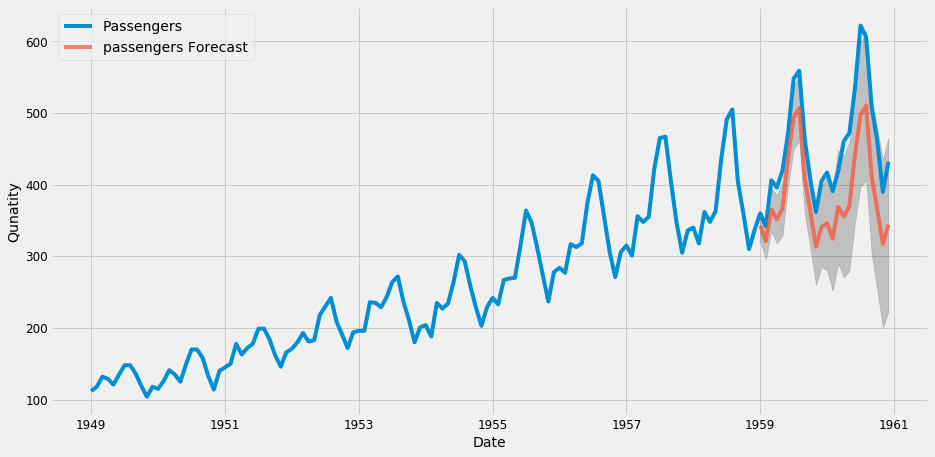

In [117]:
pred = results.get_forecast(steps=24)

pred_ci = pred.conf_int()
print(pred_ci.shape)

print(pred_ci)
ax = dataset['1949':].plot(label='passengers observed')
pred.predicted_mean.plot(ax=ax, label='passengers Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Passengers')

plt.legend()
plt.show()

In [118]:
y_forecasted = pred.predicted_mean
y = test['Passengers'].resample('MS').mean()
y_truth = y['1959-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 71.83
